In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# Checking for Null Values
dataset.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [4]:
# Checking class balance
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
# Categorical data Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X.iloc[:,1:3] = enc.fit_transform(X.iloc[:,1:3])
print(X.shape)

(10000, 10)


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['CreditScore','Age','Tenure','Balance','EstimatedSalary']] = sc.fit_transform(X[['CreditScore','Age',
                                                                                       'Tenure','Balance','EstimatedSalary']])

In [7]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22,shuffle = True)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1604
           1       0.47      0.47      0.47       396

    accuracy                           0.79      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.79      0.79      0.79      2000



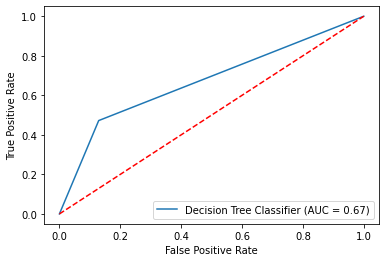

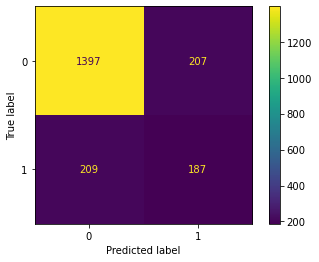

In [8]:
#Decision Tree Classifier
dtclf = DecisionTreeClassifier(random_state = 12)
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

In [9]:
#Saving Result of Decision Tree Classifier
x1 = X_test.reset_index()
y1 = y_test.reset_index()
pred = pd.DataFrame(y_pred,columns = ['Predicted'])
result = pd.concat([x1,y1,pred],axis = 1)
result.drop(['index'],axis =1, inplace = True)
result.to_csv('Decision Tree.csv',index = False)
result

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted
0,-0.843560,2.0,0.0,-0.469311,0.341352,1.095765,1,0,0,1.677431,0,0
1,0.325625,0.0,0.0,1.247053,-0.004426,0.579934,1,1,0,-1.373819,1,0
2,1.670706,2.0,1.0,-0.087897,-0.695982,0.811483,2,1,1,1.299524,0,0
3,-2.219681,1.0,1.0,0.579578,-0.695982,0.446407,2,1,1,1.451112,1,1
4,0.915392,0.0,1.0,-0.469311,1.378686,-1.225848,1,1,0,-0.686968,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.097996,2.0,1.0,-0.755372,-1.387538,0.129405,1,1,1,0.655461,0,0
1996,0.563601,2.0,1.0,-0.278604,-1.387538,0.563247,1,1,1,-1.361265,0,0
1997,-0.791826,2.0,1.0,-0.278604,-0.350204,0.023746,1,1,0,1.164658,1,0
1998,-1.464367,0.0,1.0,-0.850726,0.341352,-1.225848,2,1,0,1.399964,0,0


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1604
           1       0.52      0.12      0.20       396

    accuracy                           0.80      2000
   macro avg       0.67      0.55      0.54      2000
weighted avg       0.76      0.80      0.75      2000



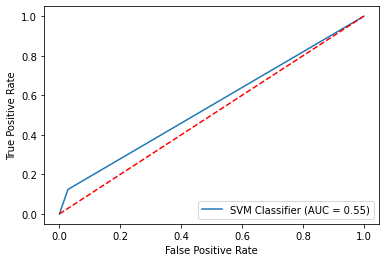

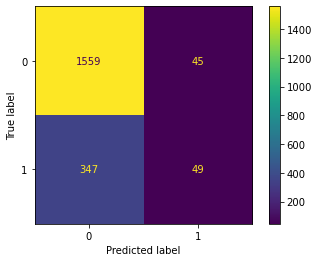

In [10]:
#SVM Classifier
svcclf = LinearSVC(random_state = 12)
svcclf = svcclf.fit(X_train,y_train)
y_pred = svcclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM Classifier')
display.plot() 
plt.plot([0, 1], [0, 1],'r--')# doctest: +SKIP
plt.show()  
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

In [11]:
# Saving Result of SVM Classifier
x1 = X_test.reset_index()
y1 = y_test.reset_index()
pred = pd.DataFrame(y_pred,columns = ['Predicted'])
result = pd.concat([x1,y1,pred],axis = 1)
result.drop(['index'],axis =1, inplace = True)
result.to_csv('SVM result.csv',index = False)
result

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted
0,-0.843560,2.0,0.0,-0.469311,0.341352,1.095765,1,0,0,1.677431,0,0
1,0.325625,0.0,0.0,1.247053,-0.004426,0.579934,1,1,0,-1.373819,1,0
2,1.670706,2.0,1.0,-0.087897,-0.695982,0.811483,2,1,1,1.299524,0,0
3,-2.219681,1.0,1.0,0.579578,-0.695982,0.446407,2,1,1,1.451112,1,0
4,0.915392,0.0,1.0,-0.469311,1.378686,-1.225848,1,1,0,-0.686968,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.097996,2.0,1.0,-0.755372,-1.387538,0.129405,1,1,1,0.655461,0,0
1996,0.563601,2.0,1.0,-0.278604,-1.387538,0.563247,1,1,1,-1.361265,0,0
1997,-0.791826,2.0,1.0,-0.278604,-0.350204,0.023746,1,1,0,1.164658,1,0
1998,-1.464367,0.0,1.0,-0.850726,0.341352,-1.225848,2,1,0,1.399964,0,0


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1604
           1       0.55      0.20      0.29       396

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.77      0.81      0.77      2000



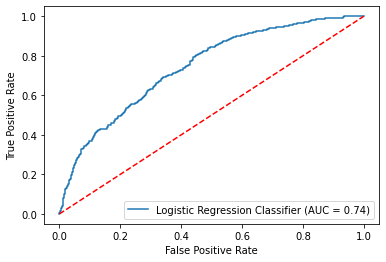

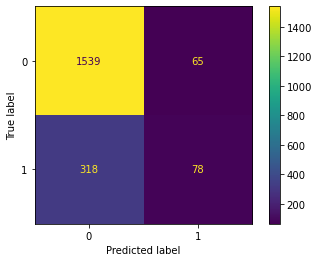

In [12]:
#Logistic Regression Classifier
lgclf = LogisticRegression(random_state = 12)
lgcclf = lgclf.fit(X_train,y_train)
y_pred_proba = lgclf.predict_proba(X_test)
y_pred = lgclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1],drop_intermediate=True)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

In [13]:
#Saving Result of LogReg Classifier
x1 = X_test.reset_index()
y1 = y_test.reset_index()
pred = pd.DataFrame(y_pred,columns = ['Predicted'])
result = pd.concat([x1,y1,pred],axis = 1)
result.drop(['index'],axis =1, inplace = True)
result.to_csv('LogReg result.csv',index = False)
result

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted
0,-0.843560,2.0,0.0,-0.469311,0.341352,1.095765,1,0,0,1.677431,0,0
1,0.325625,0.0,0.0,1.247053,-0.004426,0.579934,1,1,0,-1.373819,1,1
2,1.670706,2.0,1.0,-0.087897,-0.695982,0.811483,2,1,1,1.299524,0,0
3,-2.219681,1.0,1.0,0.579578,-0.695982,0.446407,2,1,1,1.451112,1,0
4,0.915392,0.0,1.0,-0.469311,1.378686,-1.225848,1,1,0,-0.686968,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.097996,2.0,1.0,-0.755372,-1.387538,0.129405,1,1,1,0.655461,0,0
1996,0.563601,2.0,1.0,-0.278604,-1.387538,0.563247,1,1,1,-1.361265,0,0
1997,-0.791826,2.0,1.0,-0.278604,-0.350204,0.023746,1,1,0,1.164658,1,0
1998,-1.464367,0.0,1.0,-0.850726,0.341352,-1.225848,2,1,0,1.399964,0,0
